In [19]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib as plt

In [20]:
df = pd.read_csv('coffee_sales_dataset.csv', parse_dates=['date'])
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1200 non-null   object        
 1   date            1200 non-null   datetime64[ns]
 2   region          1200 non-null   object        
 3   store           1200 non-null   object        
 4   product         1200 non-null   object        
 5   size            1200 non-null   object        
 6   qty             1200 non-null   int64         
 7   unit_price      1200 non-null   float64       
 8   discount_pct    1200 non-null   int64         
 9   revenue         1200 non-null   float64       
 10  customer_id     1200 non-null   object        
 11  customer_type   1200 non-null   object        
 12  payment_method  1200 non-null   object        
 13  note            67 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
me

,order_id,date,region,store,product,size,qty,unit_price,discount_pct,revenue,customer_id,customer_type,payment_method,note
count,1200,1200,1200,1200,1200,1200,1200.000000,1200.000000,1200.000000,1200.000000,1200,1200,1200,67
unique,1200,NaN,3,6,8,3,NaN,NaN,NaN,NaN,1115,2,3,1
top,ORD100000,NaN,Cairo,Cairo Central,Americano,M,NaN,NaN,NaN,NaN,CUST5491,Returning,Card,promo
freq,1,NaN,834,211,165,608,NaN,NaN,NaN,NaN,3,920,595,67
mean,NaN,2024-07-02 03:28:48,NaN,NaN,NaN,NaN,2.039167,40.553833,1.195833,81.535283,NaN,NaN,NaN,NaN
min,NaN,2024-01-01 07:00:00,NaN,NaN,NaN,NaN,1.000000,23.750000,0.000000,21.250000,NaN,NaN,NaN,NaN
25%,NaN,2024-04-08 03:45:00,NaN,NaN,NaN,NaN,1.000000,31.500000,0.000000,47.500000,NaN,NaN,NaN,NaN
50%,NaN,2024-06-28 19:30:00,NaN,NaN,NaN,NaN,2.000000,42.750000,0.000000,81.600000,NaN,NaN,NaN,NaN
75%,NaN,2024-09-30 23:00:00,NaN,NaN,NaN,NaN,3.000000,47.500000,0.000000,114.000000,NaN,NaN,NaN,NaN
max,NaN,2024-12-30 20:00:00,NaN,NaN,NaN,NaN,3.000000,52.500000,15.000000,157.500000,NaN,NaN,NaN,NaN


In [9]:
print("🔹 Missing values per column:")
print(df.isnull().sum())

df = df.dropna(subset=["order_id", "date", "product"])


numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["day_name"] = df["date"].dt.day_name()

print("\n✅ Data cleaned successfully!")
display(df.head())


🔹 Missing values per column:
order_id             0
date                 0
region               0
store                0
product              0
size                 0
qty                  0
unit_price           0
discount_pct         0
revenue              0
customer_id          0
customer_type        0
payment_method       0
note              1133
dtype: int64

✅ Data cleaned successfully!


,order_id,date,region,store,product,size,qty,unit_price,discount_pct,revenue,customer_id,customer_type,payment_method,note,month,year,day_name
0,ORD100000,2024-04-12 18:00:00,Cairo,Maadi,Americano,S,1,28.50,0,28.5,CUST5439,Returning,Card,NaN,4,2024,Friday
1,ORD100001,2024-12-14 08:00:00,Giza,Cairo Central,Flat White,S,1,39.90,0,39.9,CUST6972,Returning,Card,NaN,12,2024,Saturday
2,ORD100002,2024-09-27 11:00:00,Cairo,Nasr City,Cappuccino,L,2,47.25,0,94.5,CUST1858,Returning,Cash,NaN,9,2024,Friday
3,ORD100003,2024-04-16 07:00:00,Giza,Alex Shop,Flat White,M,1,42.00,0,42.0,CUST6519,New,Cash,NaN,4,2024,Tuesday
4,ORD100004,2024-03-12 13:00:00,Cairo,Cairo Central,Latte,M,3,40.00,0,120.0,CUST8385,New,Card,NaN,3,2024,Tuesday


🔹 Top 10 Best-Selling Coffee Products:
product
Americano     331
Latte         327
Mocha         317
Flat White    308
Cold Brew     300
Iced Latte    297
Espresso      296
Cappuccino    271
Name: qty, dtype: int64


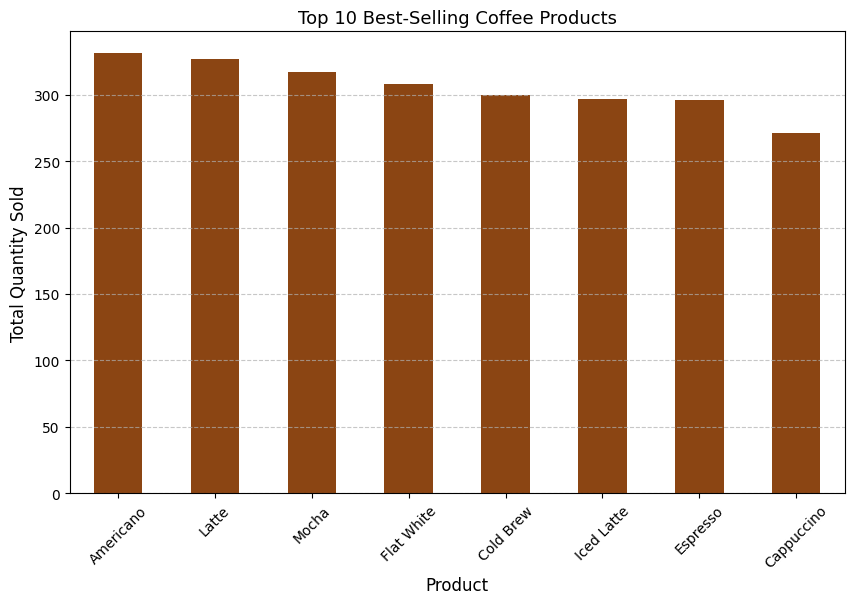

In [10]:
top_products = (
    df.groupby("product")["qty"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("🔹 Top 10 Best-Selling Coffee Products:")
print(top_products)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='saddlebrown')
plt.title("Top 10 Best-Selling Coffee Products", fontsize=13)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Top 10 Products by Revenue:
product
Mocha         15544.26
Cold Brew     14098.32
Iced Latte    13501.00
Latte         12900.00
Flat White    12747.52
Cappuccino    12049.21
Americano      9821.03
Espresso       7181.00
Name: revenue, dtype: float64


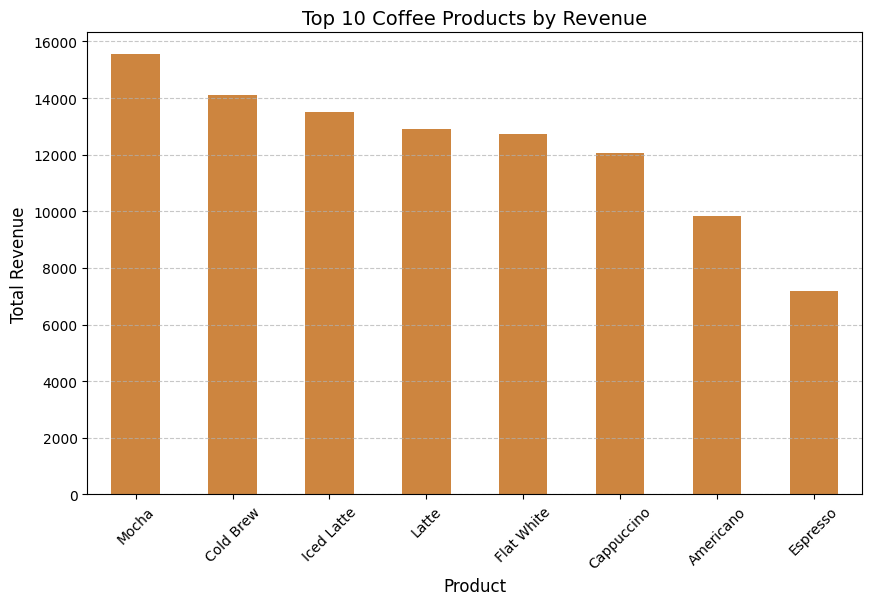

In [12]:
top_revenue = (
    df.groupby("product")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Products by Revenue:")
print(top_revenue)

plt.figure(figsize=(10,6))
top_revenue.plot(kind='bar', color='peru')
plt.title("Top 10 Coffee Products by Revenue", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


🌍 Revenue by Region:
region
Cairo         67873.67
Giza          20488.81
Alexandria     9479.86
Name: revenue, dtype: float64


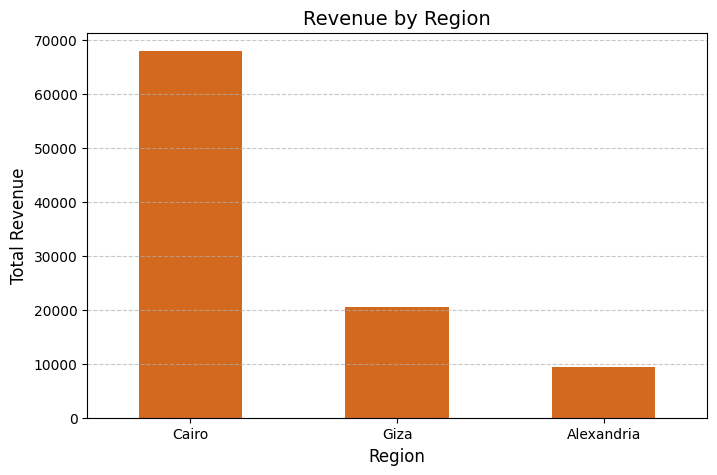

In [13]:
region_sales = (
    df.groupby("region")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

print("🌍 Revenue by Region:")
print(region_sales)

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='chocolate')
plt.title("Revenue by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


👥 Customer Type Revenue Analysis:
                    sum       mean  count
customer_type                            
Returning      74074.87  80.516163    920
New            23767.47  84.883821    280


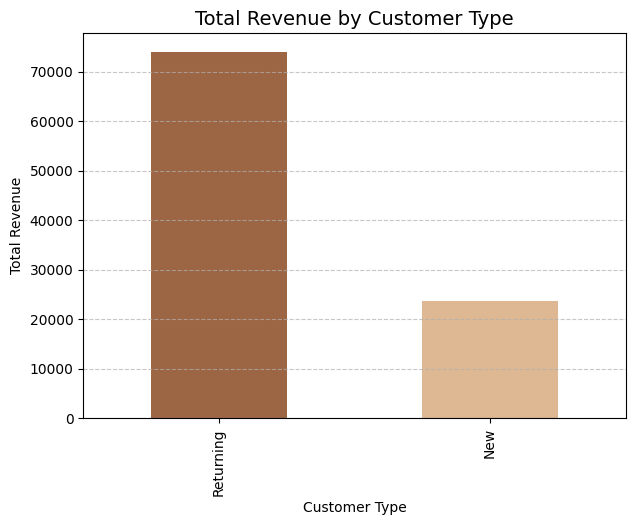

In [ ]:
customer_analysis = (
    df.groupby("customer_type")["revenue"]
    .agg(["sum", "mean", "count"])
    .sort_values(by="sum", ascending=False)
)

print("👥 Customer Type Revenue Analysis:")
print(customer_analysis)

plt.figure(figsize=(7,5))
customer_analysis["sum"].plot(kind="bar", color=["#9C6644", "#DDB892"])
plt.title("Total Revenue by Customer Type", fontsize=14)
plt.xlabel("Customer Type")
plt.ylabel("Total Revenue")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


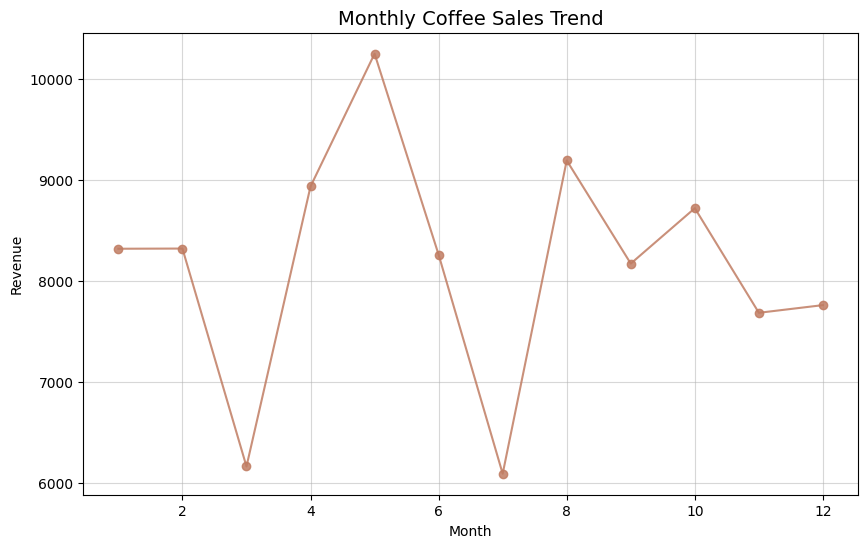

    year  month  revenue
7   2024      8  9189.35
8   2024      9  8169.55
9   2024     10  8717.47
10  2024     11  7683.01
11  2024     12  7758.85


In [16]:
df["date"] = pd.to_datetime(df["date"])

df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

monthly_sales = (
    df.groupby(["year", "month"])["revenue"]
    .sum()
    .reset_index()
    .sort_values(["year", "month"])
)

plt.figure(figsize=(10,6))
plt.plot(monthly_sales["month"], monthly_sales["revenue"], marker="o", linestyle="-", color="#C07C62D8")
plt.title("Monthly Coffee Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(alpha=0.5)
plt.show()

print(monthly_sales.tail())


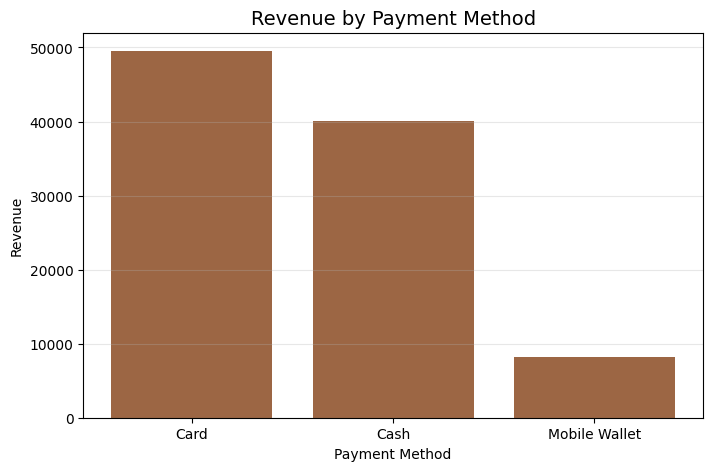

  payment_method   revenue
0           Card  49516.94
1           Cash  40067.29
2  Mobile Wallet   8258.11


In [17]:
payment_sales = (
    df.groupby("payment_method")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.bar(payment_sales["payment_method"], payment_sales["revenue"], color="#9C6644")
plt.title("Revenue by Payment Method", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Revenue")
plt.grid(axis="y", alpha=0.3)
plt.show()

print(payment_sales)
